<a href="https://colab.research.google.com/github/lilreel/KampusMerdika_StudiIndependen_Zenius_AcceleratedMLProgram/blob/main/6.%20Topic11_12_HW_Chalil%20Al%20Vareel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Day 11 - Homework!

# Soal:

1. Perhatikan kolom 'Currency' dan 'Annual_Price'. Buatlah kolom baru bernama `CleanedPrice`. Kolom ini dibuat berdasarkan informasi dari 'Annual_Price' dan 'Currency', sehingga harga sewa tahunan di `CleanedPrice` memiliki mata uang yang sama, yaitu IDR (Rupiah). Gunakan Asumsi 1 USD = 15 000 IDR.
2. Analisalah kolom 'No_Rooms' dan 'CleanedPrice'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut? 
3. Apartemen di Kota/Kabupaten mana yang memiliki rata-rata harga paling tinggi? Buatlah visualisasi untuk mendukung klaim Anda. 
4. Analisalah kolom 'Longitude' dan 'Latitude'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Ada kejanggalan yang ***bisa dijelaskan***, sehingga data tersebut meskipun janggal tapi sah-sah saja, dan ada pula kejanggalan yang ***salah***, sehingga data tersebut harus diperbaiki. Kejanggalan tipe apa yang muncul di kolom 'Longitude' dan 'Latitude'? Bila kejanggalan tersebut bisa dijelaskan, maka jelaskanlah. Bila kejanggalan tersebut merupakan sebuah kesalahan, maka coba perbaikilah. 

# Jawab

## Handling Missing Value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/lilreel/Datasets/main/_Miscellaneous/housepricesdata.csv"
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5302 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 538.7+ KB


Penjelasan:
1. Unit_Name: Nama Unit Apartmen
2. No_Rooms: Jumlah bedrooms
3. Bathroom: Jumlah kamar mandi
4. Locality: Daerah
5. Region: Kota/Kabupaten
6. Longitude dan Latitude: letak geografis
7. Furnished: 1 jika fully furnished, 0 jika non-furnished
8. Area: Luas
9. Tower: Lokasi Tower
10. Total_Facilities: Jumlah Total Fasilitas
11. Currency: Mata Uang (USD/IDR)
12. Annual_Price: Harga sewa tahunan (sesuai mata uang)

In [4]:
df.head(10)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000
5,Green Pramuka City Apartment 2BR Fully Furnished,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,1,33.0,Tower Fagio,21,IDR,60000000
6,Springhill Terrace Residence 2BR Fully Furnished,2,1,Kemayoran,Jakarta Pusat,106.850107,-6.149070,1,58.0,Tower OAKWOOD,14,IDR,80000000
7,Kemang Village Apartment 3BR Fully Furnished,3,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,132.0,Tower Empire,22,IDR,240000000
8,Kalibata City Apartment 2BR Tower Gaharu,2,1,Pancoran,Jakarta Selatan,106.851836,-6.257163,1,33.0,Tower Gaharu,20,IDR,45400000
9,Green Pramuka City Apartment 2BR Tower Penelope,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,0,33.0,Tower Penelope,17,IDR,33000000


In [5]:
df[df['Unit_Name'].isnull()]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
1491,NaN,2,2,Thamrin,Jakarta Pusat,106.818654,-6.194443,1,74.0,Tower Cosmo Mansion,21,IDR,120000000


In [6]:
df_update = df.copy()
df_update['Unit_Name'] = df_update['Unit_Name'].fillna(value = 'Hotel Ascott')
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5303 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 538.7+ KB


## 1. Make a colum with name 'CleanedPrice' with from 'Annual_Price' converted into IDR

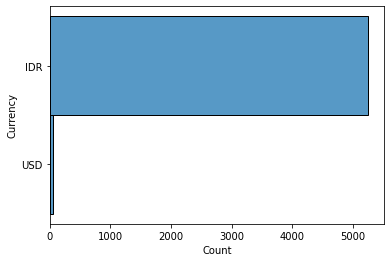

In [7]:
# Cek apakah ada yang currency nya USD
sns.histplot(data = df_update, y = 'Currency')

In [8]:
# Cek apakah ada yang currency nya USD
df.loc[df['Currency'] == 'USD']

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
76,1 Park Residences 2BR Fully Furnished,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,91.0,Tower A,24,USD,19800
358,Kemang Village Apartment 3BR View City,3,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,168.0,Tower Ritz,22,USD,28800
443,Kemang Village Apartment 2BR Fully Furnished,2,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,130.0,Tower Intercone,21,USD,20400
453,1 Park Residences 2BR View City,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,94.0,Tower B,24,USD,21600
462,BEST DEAL & still negotiable !!! SETIABUDI SKY...,3,2,Setiabudi,Jakarta Selatan,106.828806,-6.215463,1,135.0,Tower 1,18,USD,27600
770,Residences 8 Senopati 1BR,1,1,Senopati,Jakarta Selatan,106.806005,-6.228974,1,94.0,Tower 3,14,USD,19200
781,District 8 Senopati 2BR FULLY FURNISHED,2,2,Senopati,Jakarta Selatan,106.806680,-6.228444,1,105.0,Tower Infinity,18,USD,28800
1033,District 8 Senopati 3BR,3,3,Senopati,Jakarta Selatan,106.806680,-6.228444,1,179.0,Tower Infinity,18,USD,42000
1055,Kemang Village Apartment 4BR View City (Selatan),4,3,Kemang,Jakarta Selatan,106.811453,-6.259374,0,249.0,Tower Bloomington,19,USD,44400
1149,Pakubuwono Residence 3BR Tower Sandalwood,3,3,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,0,303.0,Tower Sandalwood,22,USD,54000


In [9]:
# Eksekusi

## buat dataframe yang menampung Annual Price IDR
idr_real = df_update["Annual_Price"][df_update["Currency"] == 'IDR']

## buat dataframe yang menampung Annual Price USD
usd_price = df_update["Annual_Price"][df_update["Currency"] != 'IDR']

##USD = IDR x 15000
usd_toIdr = usd_price * 15000

#Masukkan kedua dataframe di atas sebagai Cleaned Price
df_update.loc[df_update["Currency"] != 'IDR', "CleanedPrice"] = usd_toIdr
df_update.loc[df_update["Currency"] == 'IDR', "CleanedPrice"] = idr_real
df_update

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000.0
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000,30000000.0
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000,70000000.0
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000,576000000.0
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000,32000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000,36000000.0
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000,60000000.0
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000,250000000.0
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000,108000000.0


## 2. Analyse anomaly between column 'No_Rooms' and 'CleanedPrice'

In [10]:
df_update.sort_values(by = 'CleanedPrice', ascending = False)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
1163,Signature Park Grande Studio Fully Furnished,0,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,25.0,Tower Green Signature,20,USD,54000000,8.100000e+11
3923,Pakubuwono Residence 4BR Tower CottonWood,4,4,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,1,548.0,Tower CottonWood,24,USD,108000,1.620000e+09
3622,Pacific Place Residence 4BR Semi Furnished,4,5,SCBD,Jakarta Selatan,106.810134,-6.225613,0,500.0,Tower 2,21,IDR,1296000000,1.296000e+09
4395,Essence Darmawangsa Apartment 3BR Tower East,3,3,Dharmawangsa,Jakarta Selatan,106.804426,-6.258746,1,322.0,Tower East,22,IDR,1128000000,1.128000e+09
3611,ST Moritz Apartment 6BR Fully Furnished,6,4,Puri Indah,Jakarta Barat,106.738730,-6.190723,1,576.0,Tower Ambassador,24,IDR,1000000000,1.000000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,The Springlake Summarecon Studio View Mall,0,1,Summarecon Bekasi,Bekasi,106.999000,-6.222400,0,21.0,Tower Davallia,12,IDR,15000000,1.500000e+07
2131,Delta Cakung Apartment Studio Tower Tower DB,0,1,Cakung,Jakarta Timur,106.933983,-6.193510,1,21.0,Tower Tower DB,18,IDR,15000000,1.500000e+07
1806,Margonda Residence Studio View Garden,0,1,Margonda,Depok,106.834500,-6.363500,1,21.0,Tower D,5,IDR,14000000,1.400000e+07
5165,Kota Ayodhya Apartment Studio Non Furnished,0,1,Cikokol,Tangerang,106.629106,-6.199893,0,23.0,Tower Sienna,17,IDR,12000000,1.200000e+07


### Percobaan 1. Menggunakan Annual Price

In [12]:
df_update['No_Rooms'].corr(df_update['Annual_Price'], 'spearman')

0.44348222797768927

In [13]:
df_update['No_Rooms'].corr(df_update['Annual_Price'], 'pearson')

0.4279638329689948

In [14]:
df_update.corr("spearman")

,No_Rooms,Bathroom,Longitude,Latitude,Furnished,Area,Total_Facilities,Annual_Price,CleanedPrice
No_Rooms,1.000000,0.542666,0.087671,0.046411,0.037755,0.719231,0.255160,0.443482,0.473236
Bathroom,0.542666,1.000000,-0.086761,-0.092266,0.039528,0.653163,0.217227,0.529328,0.578482
Longitude,0.087671,-0.086761,1.000000,-0.038518,0.111058,-0.050444,0.095258,-0.014406,-0.026561
Latitude,0.046411,-0.092266,-0.038518,1.000000,-0.195679,-0.015430,-0.038350,-0.197723,-0.228393
Furnished,0.037755,0.039528,0.111058,-0.195679,1.000000,0.070572,0.421336,0.266228,0.277169
Area,0.719231,0.653163,-0.050444,-0.015430,0.070572,1.000000,0.376651,0.763909,0.809543
Total_Facilities,0.255160,0.217227,0.095258,-0.038350,0.421336,0.376651,1.000000,0.447938,0.464702
Annual_Price,0.443482,0.529328,-0.014406,-0.197723,0.266228,0.763909,0.447938,1.000000,0.946204
CleanedPrice,0.473236,0.578482,-0.026561,-0.228393,0.277169,0.809543,0.464702,0.946204,1.000000


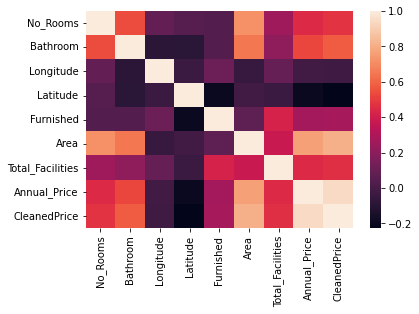

In [15]:
bx = sns.heatmap(df_update.corr('spearman'))

### Percobaan 2. Menggunakan Cleaned Price

In [16]:
df_update['No_Rooms'].corr(df_update['CleanedPrice'], 'spearman')

0.4732359553626859

In [17]:
df_update['No_Rooms'].corr(df_update['CleanedPrice'], 'pearson')

-0.017502892191075998

In [18]:
df_update.corr("spearman")

,No_Rooms,Bathroom,Longitude,Latitude,Furnished,Area,Total_Facilities,Annual_Price,CleanedPrice
No_Rooms,1.000000,0.542666,0.087671,0.046411,0.037755,0.719231,0.255160,0.443482,0.473236
Bathroom,0.542666,1.000000,-0.086761,-0.092266,0.039528,0.653163,0.217227,0.529328,0.578482
Longitude,0.087671,-0.086761,1.000000,-0.038518,0.111058,-0.050444,0.095258,-0.014406,-0.026561
Latitude,0.046411,-0.092266,-0.038518,1.000000,-0.195679,-0.015430,-0.038350,-0.197723,-0.228393
Furnished,0.037755,0.039528,0.111058,-0.195679,1.000000,0.070572,0.421336,0.266228,0.277169
Area,0.719231,0.653163,-0.050444,-0.015430,0.070572,1.000000,0.376651,0.763909,0.809543
Total_Facilities,0.255160,0.217227,0.095258,-0.038350,0.421336,0.376651,1.000000,0.447938,0.464702
Annual_Price,0.443482,0.529328,-0.014406,-0.197723,0.266228,0.763909,0.447938,1.000000,0.946204
CleanedPrice,0.473236,0.578482,-0.026561,-0.228393,0.277169,0.809543,0.464702,0.946204,1.000000


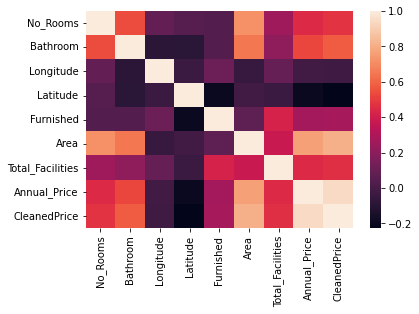

In [19]:
bx = sns.heatmap(df_update.corr('spearman'))

### Conclusion

Jika dibandingkan dengan Cleaned Price, Annual Price memiliki 2 korelasi dengan nilai yang tidak jauh berbeda, kedua nilai tersebut menggambarkan bahwa ada korelasi antara Annual Price dengan No_Rooms karena nilai yang dimiliki tidak terlalu tinggi dibandingkan dengan value yang dikonversikan dari USD ke IDR di kolom Cleaned Price

## 3. Which City/Regency that has the highest average of Cleaned Price?

### Outliers Handling

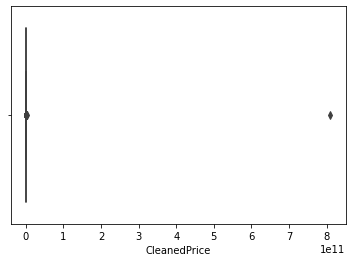

In [20]:
fig = plt.figure()  
ax = sns.boxplot(data = df_update, x = 'CleanedPrice')
plt.show() 

In [21]:
# IQR
Q1 = np.percentile(df_update['CleanedPrice'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_update['CleanedPrice'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_update.shape)
 
# Upper bound
upper = np.where(df_update['CleanedPrice'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_update['CleanedPrice'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_update.drop(upper[0], inplace = True)
df_update.drop(lower[0], inplace = True)
 
print("New Shape: ", df_update.shape)

Old Shape:  (5303, 14)
New Shape:  (4889, 14)


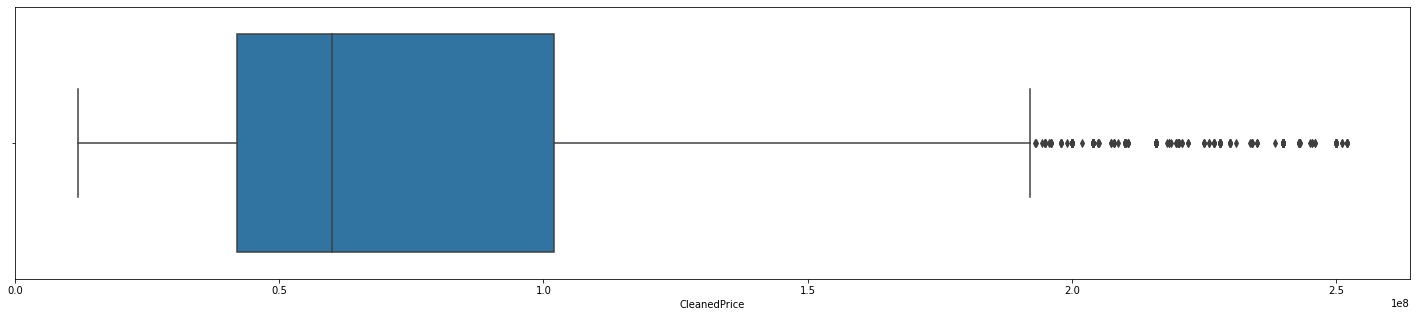

In [22]:
fig = plt.figure()  
ax = sns.boxplot(data = df_update, x = 'CleanedPrice')
fig.set_figwidth(25)
fig.set_figheight(5)
plt.show() 

### Answer

In [23]:
# Grouping mean dari CleanedPrice bersadarkan Region
region_mean = df_update.groupby("Region").agg({"CleanedPrice": "mean"})
region_mean

,CleanedPrice
Region,
Bandung,5.743750e+07
Batam,7.200000e+07
Bekasi,4.401500e+07
Bogor,5.833333e+07
Depok,3.752500e+07
Jakarta Barat,6.903430e+07
Jakarta Pusat,9.240826e+07
Jakarta Selatan,1.171485e+08
Jakarta Timur,5.037366e+07


In [24]:
region_mean.describe()

,CleanedPrice
count,1.800000e+01
mean,5.596111e+07
std,2.193523e+07
min,2.675000e+07
25%,3.986144e+07
50%,5.390558e+07
75%,6.000000e+07
max,1.171485e+08


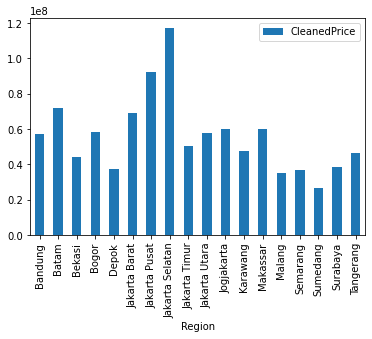

In [25]:
# Visualisasi hasil Grouping
region_mean_visual = df_update.groupby("Region").agg({"CleanedPrice": "mean"}).plot(kind = 'bar', stacked = True)
region_mean_visual

## 4. Anomaly between Latitude and Longitude

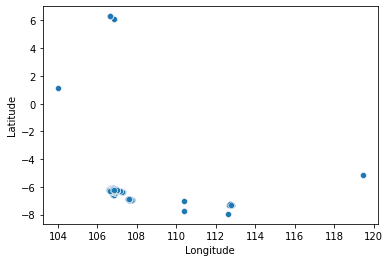

In [26]:
# 1. Coba visualisikan kedua kolom dengan Scatter Plot
fig = plt.figure()  
ax = sns.scatterplot(data = df_update, x='Longitude', y = 'Latitude')
plt.show() 

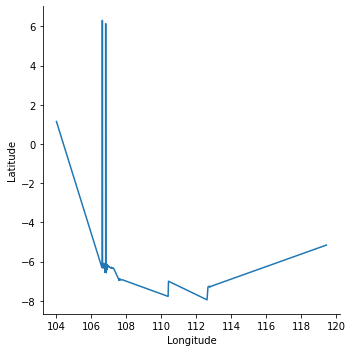

In [27]:
# 2. Coba visualisikan kedua kolom dengan Rel Plot agar setiap titik terhubung
sns.relplot(data = df_update, x='Longitude', y = 'Latitude', kind="line")

Disini mulai ada kejanggalan dimana ada titik dengan latitude yang terlampau tinggi dengan nilai longitude yang dimiliki

In [32]:
# Sortir kolom dengan latitude lebih dari 1
df.loc[df['Latitude']>=1]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
826,Best Western Mangga Dua Studio View City,0,1,Mangga Dua,Jakarta Pusat,106.827261,6.139958,1,33.0,Tower 1,18,IDR,48000000
951,B Residence BSD 1BR Tower lotus,0,1,BSD City,Tangerang,106.638100,6.304300,1,26.0,Tower lotus,20,IDR,40000000
1140,B Residence BSD Studio Non Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,0,20.0,Tower Rose,17,IDR,40000000
1667,Nagoya Mansion Apartment Studio Tower B,0,1,Lubuk Baja,Batam,104.014900,1.143400,1,28.0,Tower B,12,IDR,72000000
2344,B Residence BSD Studio Fully Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,25.0,Tower Tulip,20,IDR,55000000
3143,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,25.0,Tower Tulip,18,IDR,55000000
3175,B Residence BSD Studio View AEON Mall,0,1,BSD City,Tangerang,106.638100,6.304300,1,22.0,Tower Tulip,18,IDR,45000000
4469,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,26.0,Tower Tulip,19,IDR,60000000


Setelah dicoba menggunakan website https://www.gps-coordinates.net/ untuk mencari lokasi berdasarkan Latitude dan Longitude. Terbukti bahwa selain dari Kota Batam, Koordinat dari row yang lain mengarah ke **Laut Cina Selatan**

Bukti 1. Row 951 dan 1140
<br>
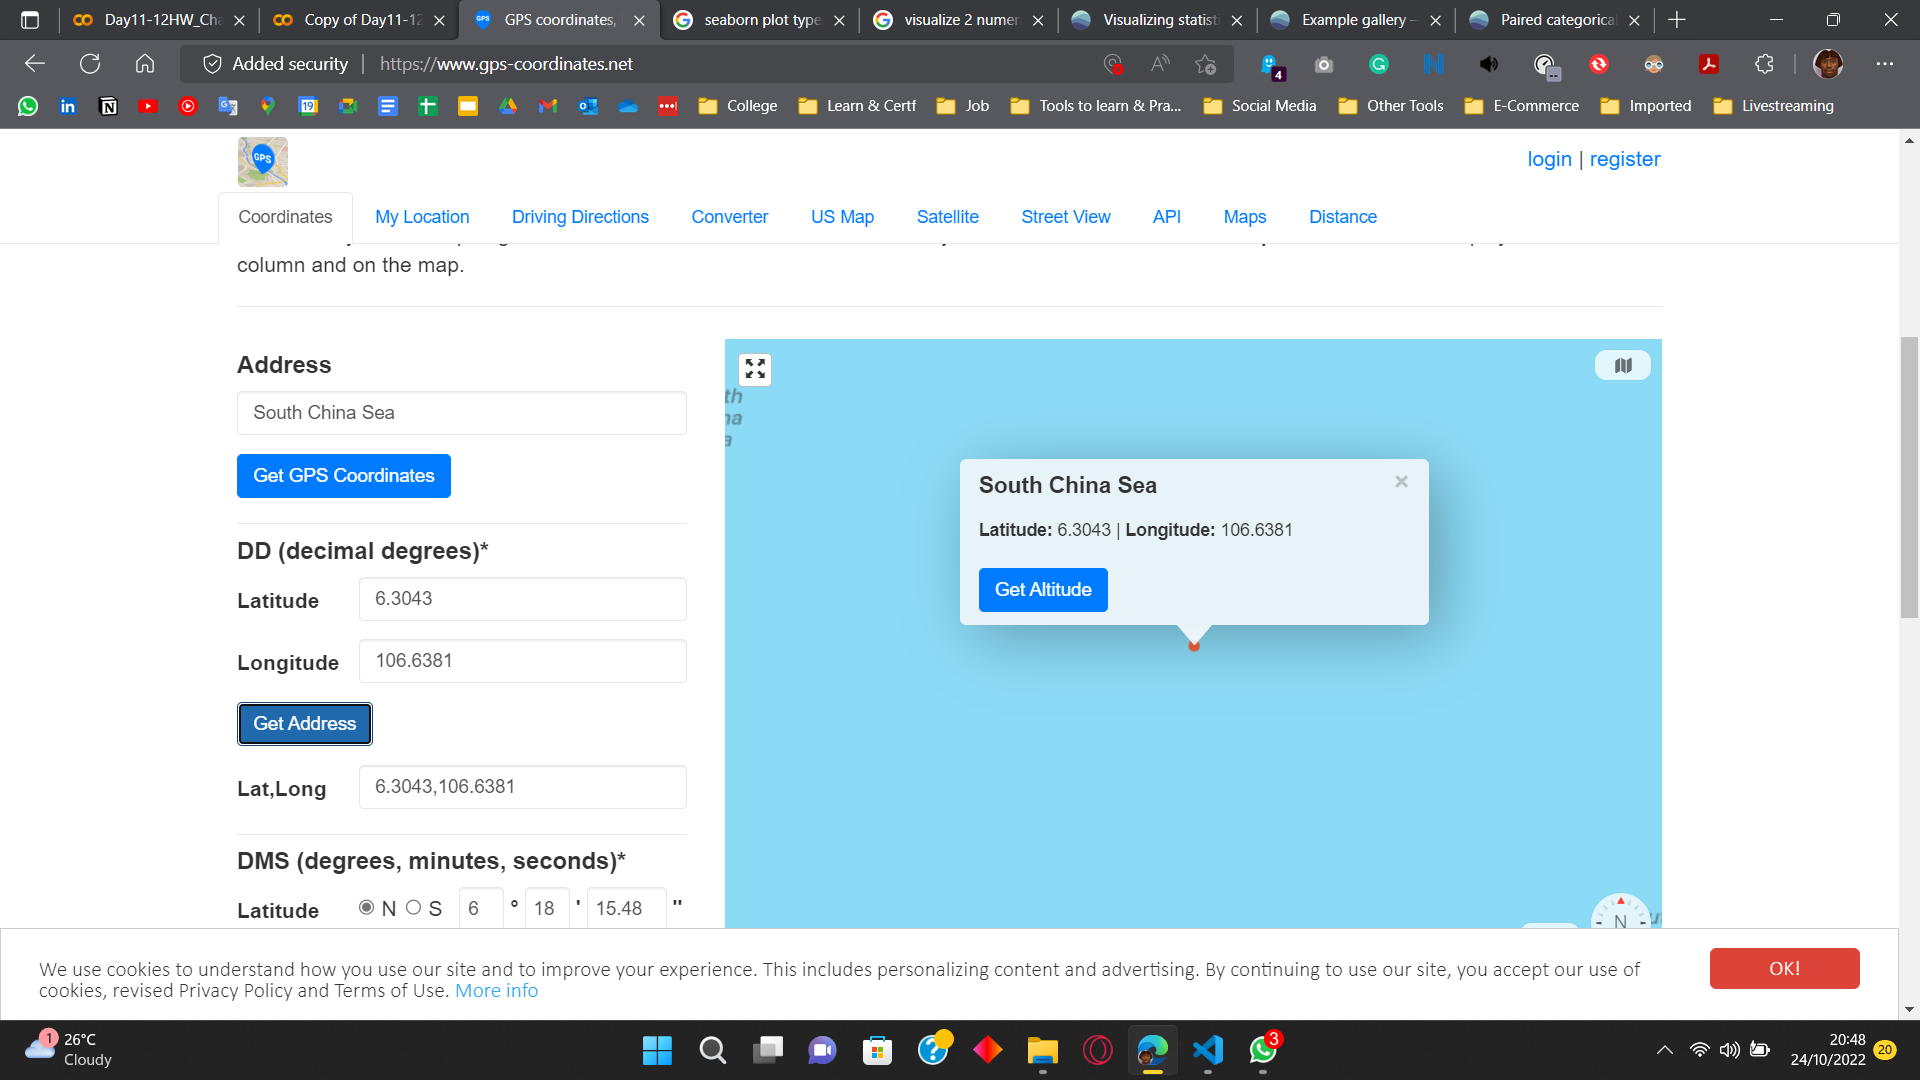

Setelah diteliti, ternyata Latitude akan mengarah ke lokasi yang benar apabila nilainya Minus.
<br>
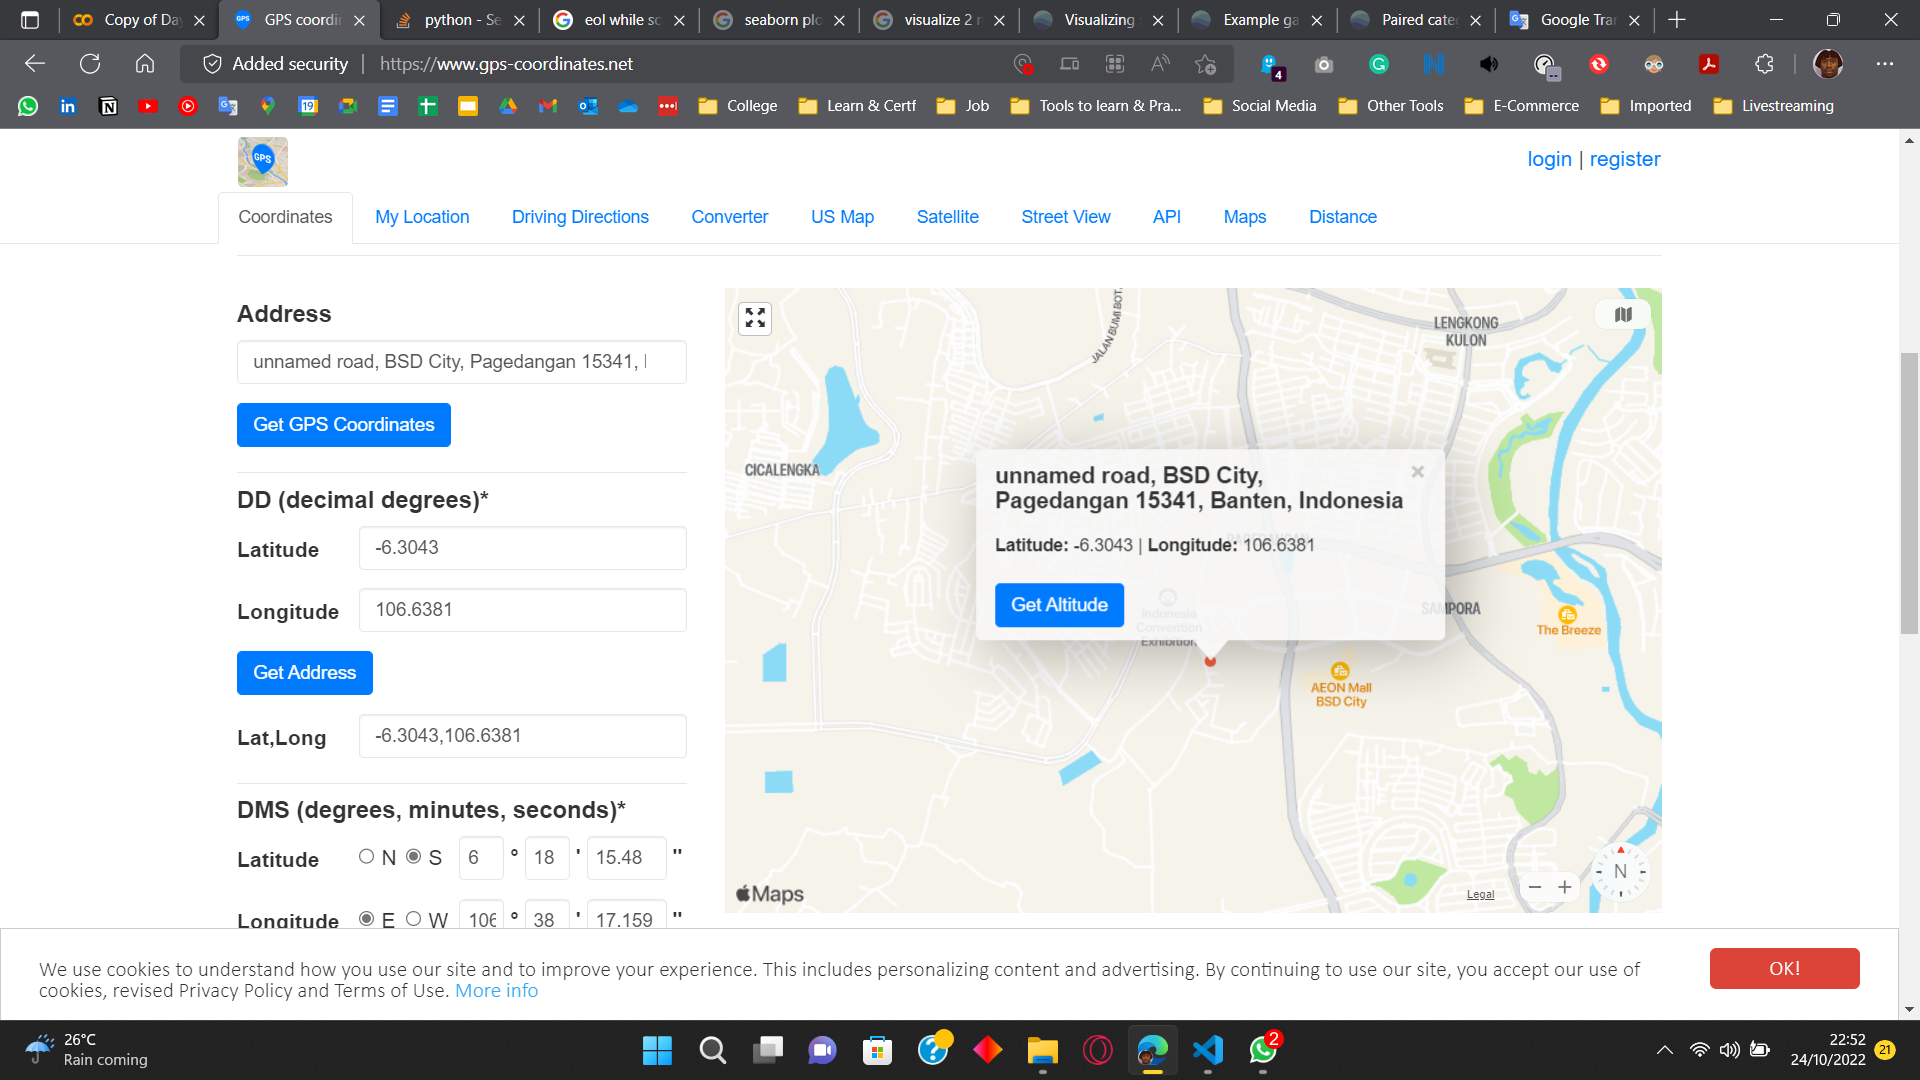

### Conclusion

Beberapa rows memiliki kesalahan pada nilai Lattitude yang kehilangan nilai minus yang menyebabkan koordinat tertuju pada lokasi yang salah.